#### **Working with Time Series Data**

- Pandas DataFrames are quite useful to work with Time-Series Data.

- For univariate time-series a Pandas series datatype with date-time index will be useful. For multi-variate time-series, a 2 dimensional Pandas DataFrame, with seveal columns may be useful.

- For slightly more complex analytics, where they may be multiple covariates with several time periods and samples, there are data formats such as DarTS, GluonTS, Sktime, pmdarima etc. Since Pandas is a common ground for most practical usecases, we can convert to and from these data formats as appropriate.

- We shall start with an understanding of reading and importing time series data.


####  **References**

[1] https://www.kaggle.com/code/soraka/tech-fund-analysis

[2] https://dataman-ai.medium.com/time-series-data-formats-made-easy-df4191531e3f

[3] Hyndman, Rob J., and George Athanasopoulos. Forecasting: principles and practice. OTexts, 2018.

[4] https://aws.amazon.com/what-is/recurrent-neural-network/





#### **Installing Dependencies**

- We shall install the following dependencies

In [ ]:
!pip install pandas -q #pandas for data cleaning, data processing
!pip install numpy  -q # mathematical functions
!pip install sktime  -q # sktime for time series forecasting
!pip install gluonts -q # gluonts for time series forecasting
!pip install plotly -q # plotly for interactive data visualization
!pip install matplotlib -q # data visualization using matplotlib
!pip install darts -q # darts : time series data
!pip install pmdarima -q # pmdarima for time series analysis and forecasting
!pip install neuralprophet -q #neural prophet model for time series analysis and forecasting

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 884.7/884.7 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 45.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB

#### **Importing Dependencies**

In [ ]:
# Importing Dependencies
from sqlalchemy import create_engine #SQL Python interface
import pandas as pd # pandas for data preprocessing and data cleaning
import matplotlib.dates as mdates #mdates from matplotlib.dates
import numpy as np # numpy for mathematical functions
import matplotlib.pyplot as plt #matplotlib for data visualization
from darts import TimeSeries #DarTS data type for Time Series
from darts.utils.utils import ModelMode, SeasonalityMode #Darts trend and seasonality
from datetime import datetime, timedelta # parsing date using datetime and time delta
from darts.dataprocessing.transformers import Scaler #Normalizing the data
from darts.utils.timeseries_generation import datetime_attribute_timeseries # returns a timeseries with index : Time Index
from darts.metrics import mape

#### **Importing .db file : a generic time-series**

- Importing a '.db' file to a pandas dataframe

- https://www.kaggle.com/datasets/sacrophyte/random-sales-data
- https://www.kaggle.com/datasets/soraka/turkey-investment-funds-data?select=FundData.db
- https://matplotlib.org/stable/gallery/ticks/date_concise_formatter.html#sphx-glr-gallery-ticks-date-concise-formatter-py


In [ ]:
from google.colab import drive # Importing google drive
drive.mount("/content/drive")

Mounted at /content/drive


#### **DarTS**

- DarTS ("Darts") is a python time series library, to provide unified interface for working with various time series forecasting models (for univariate and multivariate time series), widely used by data science and machine learning professionals.

- Darts consists of TimeSeries class, storing values in an array of shape(time, dimensions, samples)

- Time : The time index

- Dimensions: Columns in the multivariate time-series

- Samples : Values of a column and time.


- https://dataman-ai.medium.com/time-series-data-formats-made-easy-df4191531e3f

#### **Recurrent Neural Network**

- Recurrent Neural Network Models is a deep learning model, that is trained to process and convert sequential data input into a sequential data output.

- Sequential data is data such as - words, sentences or time-series data, where sequential components interrelate, based on complex semantics and syntax rules.

- RNNs are generally being replaced by large language models (which are more efficient in sequential data processing, especially text data)

- We shall go through an RNN model for time series forecasting.

- https://www.kaggle.com/datasets/ayushnitb/tourist-numbers-univariate-forecasting-dataset

#### **Hidden Layers in RNN**

- RNNs are made of  neurons or data processing nodes, that work together to identify complex patterns in the data.

- The neurons in an RNN are part of an input layer, output layer and hidden layers. The input layer receives the input data, to be processed (analysis, predictions) by the hidden layer and the output layer provides the expected result.

- RNNs pass the sequential data they receive one step at a time, to the hidden layers.

- *RNNs also have a self-looping or recurrent workflow. The hidden layer is able to remember and use previous inputs for future predictions as part of a short-term memory component. It uses the current input together with the stored memory to forecast or predict the next sequence.*

- *LSTM (Long short-term memory) is an RNN variant, that enables the model to enhance its memory capacity to accommodate a longer timeline, Whereas an RNN is able to remember the immediate past input, it is unable to use inputs from several past sequences to improve the forecast* [4].

- *LSTM has a special memory block called **cells** in the hidden layer. Each cell is controlled by an input gate, output gate and forget gate which enables the layer to remember information*. [4]

- https://aws.amazon.com/what-is/recurrent-neural-network/

In [ ]:
from darts.models import RNNModel # Importing RNNModel from darts

In [ ]:
# Importing the data to a pandas dataframe
df = pd.read_csv("/content/drive/MyDrive/Darts_data_.csv")

In [ ]:
df.head() #Display the first five rows of the dataframe

Date  TouristNumber
0  33604           8414
1  33635           9767
2  33664          13805
3  33695          12987
4  33725          32190

In [ ]:

df['Date'] = pd.date_range(start = '1993-01-01', periods = 288, freq = 'M')

In [ ]:
df.head()

Date  TouristNumber
0 1993-01-31           8414
1 1993-02-28           9767
2 1993-03-31          13805
3 1993-04-30          12987
4 1993-05-31          32190

In [ ]:
df.isna().sum() # Assessment of data cleaning

Date             0
TouristNumber    0
dtype: int64

In [ ]:
df.info() # Display the dataframe columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           288 non-null    datetime64[ns]
 1   TouristNumber  288 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.6 KB


In [ ]:
df_1 = df.copy()

In [ ]:
df.columns

Index(['Date', 'TouristNumber'], dtype='object')

In [ ]:
df_1.set_index('Date', inplace = True)

#### **Visualization of data using Plotly**

In [ ]:
pd.options.plotting.backend = "plotly" #set the data visualization backend for pandas to plotly library
ffig = df_1.plot(title = "Tourist dataset", template = "simple_white",labels = dict( index = "date"))
ffig.show()

#### **Converting the Pandas DataFrame to a darts series (TimeSeries)**

In [ ]:
time_series = TimeSeries.from_dataframe(df, "Date", "TouristNumber") # creating Darts time series from a pandas dataframe

In [ ]:
# split the dataset into training and validation data
train_data, validation_data = time_series.split_after(pd.Timestamp("20140101"))

#### **Normalizing the time series**

- We create a training and validation dataset.

- Normalize the time-series, using Darts Scaler class.

-  The documentation of Darts Scaler class suggests that we don't need to apply fit_transform() method on the validation dataset.

In [ ]:
# Normalizing the time-series using Scaler() method from Darts
transformer = Scaler()
train_transformed = transformer.fit_transform(train_data)
validation_transformed = transformer.transform(validation_data)
series_transformed = transformer.transform(time_series)

#### **Creating Month and Year Covariates**

In [ ]:
# datetime_attribute_timeseries
year_series = datetime_attribute_timeseries(
    pd.date_range(start = time_series.start_time(),
                  end = time_series.end_time(),
                  freq = time_series.freq_str,
                  ),
                  attribute = "year",
                  one_hot = False)

In [ ]:
# normalizing using scaler() method
year_series = Scaler().fit_transform(year_series)

In [ ]:
# creating month and year covariates
month_series = datetime_attribute_timeseries(
    year_series,
    attribute = "month",
    one_hot = True
)
covariates = year_series.stack(month_series)

In [ ]:
covariates_train, covariates_val = covariates.split_after(
    pd.Timestamp("20140101")
)

#### **LSTM Model**

- Instantiating an LSTM Model

In [ ]:
# Instantiating an LSTM model :
lstm_model = RNNModel(
    model = "LSTM",
    hidden_dim = 20,
    dropout = 0,
    batch_size = 16,
    n_epochs = 300,
    optimizer_kwargs={"lr": 1e-3},
    model_name = "RNN_tourists",
    log_tensorboard = True,
    random_state = 42,
    training_length = 20,
    input_chunk_length = 14,
    force_reset = True,
    save_checkpoints = True
)

In [ ]:
# model.fit() : to fit the LSTM model to the data
lstm_model.fit(
    train_transformed,
    future_covariates = covariates,
    val_series = validation_transformed,
    val_future_covariates = covariates,
    verbose = True
)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 2.9 K 
4 | V             | Linear           | 21    
---------------------------------------------------
2.9 K     Trainable params
0         Non-trainable params
2.9 K     Total params
0.023     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/trainer.py:1609: PossibleUserWarning:

The number of training batches (15) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.



Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=300` reached.


RNNModel(model=LSTM, hidden_dim=20, n_rnn_layers=1, dropout=0, training_length=20, batch_size=16, n_epochs=300, optimizer_kwargs={'lr': 0.001}, model_name=RNN_tourists, log_tensorboard=True, random_state=42, input_chunk_length=14, force_reset=True, save_checkpoints=True)

In [ ]:
len(validation_data)

36

#### **Predictions on the validation data**

In [ ]:
def eval_model(model):
  pred_series = model.predict(
      n=36,
      future_covariates = covariates)
  plt.figure(figsize = (16, 8))
  series_transformed.plot(label = "Ground Truth")
  pred_series.plot(label = "LSTM - Forecast")
  plt.title("MAPE: {:.2f}%".format(mape(pred_series, validation_transformed)))
  plt.legend()

#### **Visualization of the predictions**

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

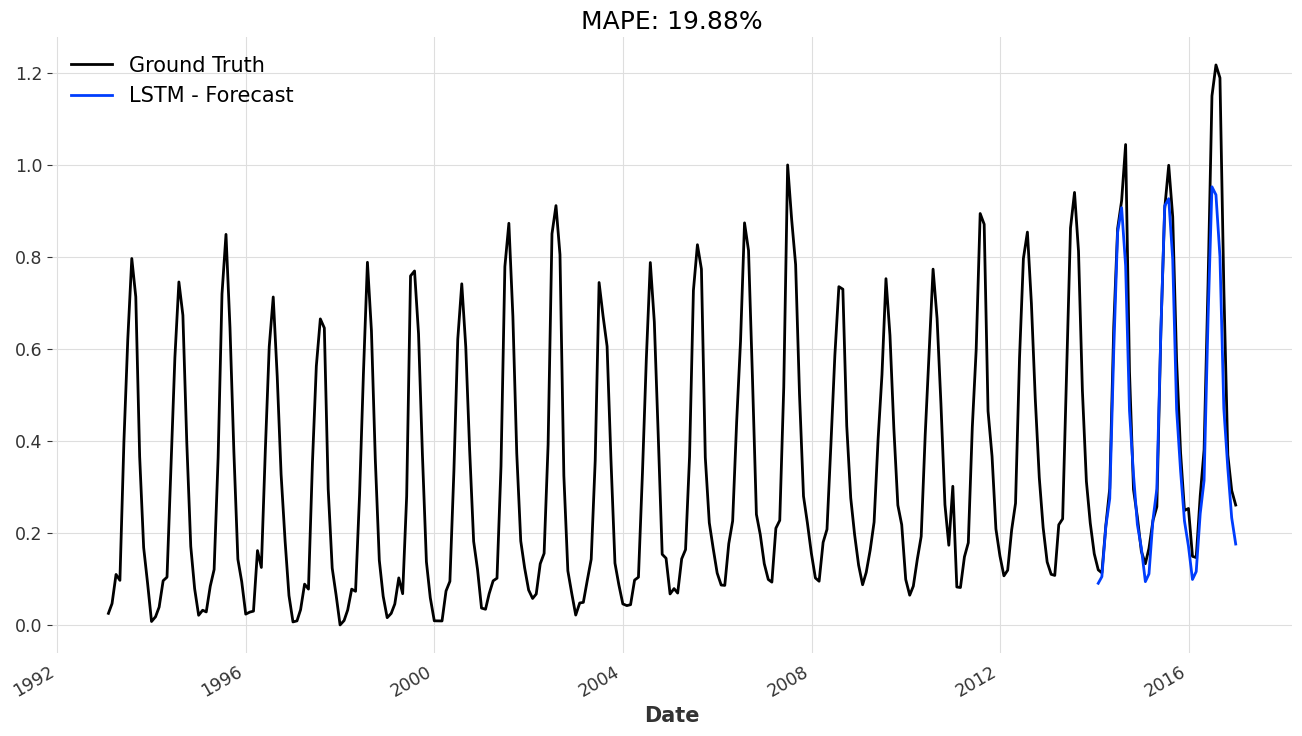

In [ ]:
eval_model(lstm_model)